In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re
#import scipy from lineregress

In [ ]:
#Read the file and also assign it to dataframe
filename = '/content/drive/MyDrive/Elon_Musk_project/tweets_with_stats_check.csv'

df = pd.read_csv(filename) 
df.head(2)

,Tweet_ID,Tweet,Created_date,Followers_count,Favorite_count,Retweet_count,Friends_count
0,1593551192176500736,@lionxmah @folha ?,2022-11-18 10:26:25,119900621,2958,126,136
1,1593541440671338496,@AOC You’re welcome,2022-11-18 09:47:40,119900654,545859,21612,136


In [ ]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = " ".join(word for word in temp)
    return temp

df2 = []
df2 = [clean_tweet(tw) for tw in df['Tweet']]  
df3 = pd.DataFrame(df2,columns = ['tweet'])
df["Tweet"] = df3

df_1 = df.iloc[:1115,:]
df_2 = df.iloc[1115:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

Shape of new dataframes - (1115, 7) , (254, 7)


<ipython-input-7-0750c27e87a6>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [ ]:
df.head(2)

,Tweet_ID,Tweet,Created_date,Followers_count,Favorite_count,Retweet_count,Friends_count
0,1593551192176500736,,2022-11-18 10:26:25,119900621,2958,126,136
1,1593541440671338496,you re welcome,2022-11-18 09:47:40,119900654,545859,21612,136


There are 72720 words in the combination of all tweets.


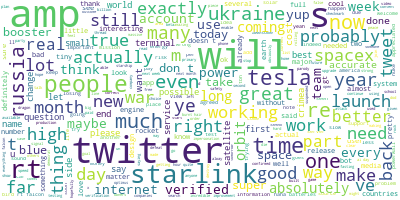

In [ ]:
mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in df3.tweet)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud( background_color='white', stopwords=stopwords, max_words=1000, max_font_size=40, random_state=42).generate(str(text))
wordcloud.to_image()

In [ ]:
fav_max = np.max(df['Favorite_count'])
rt_max  = np.max(df['Retweet_count'])

fav = df[df.Favorite_count == fav_max].index[0]
rt  = df[df.Retweet_count == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: {}".format(df['Tweet'][fav]))
print("Number of likes: {}".format(fav_max))
print("Time: {}".format(df['Created_date'][fav]),"\n")

# Max RTs:
print("The tweet with more retweets is: {}".format(df['Tweet'][rt]))
print("Number of retweets: {}".format(rt_max))
print("Time: {}".format(df['Created_date'][rt]),"\n")


The tweet with more likes is: the bird is freed
Number of likes: 2477217
Time: 2022-10-28 03:49:11 

The tweet with more retweets is: the bird is freed
Number of retweets: 352584
Time: 2022-10-28 03:49:11 



In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

format = "%Y-%m-%d %H:%M:%S"
df['Created_at_datetime'] = pd.to_datetime(df['Created_date'], format = format).dt.tz_localize(None)
df.head(2)

,Tweet_ID,Tweet,Created_date,Followers_count,Favorite_count,Retweet_count,Friends_count,Created_at_datetime
0,1593551192176500736,,2022-11-18 10:26:25,119900621,2958,126,136,2022-11-18 10:26:25
1,1593541440671338496,you re welcome,2022-11-18 09:47:40,119900654,545859,21612,136,2022-11-18 09:47:40


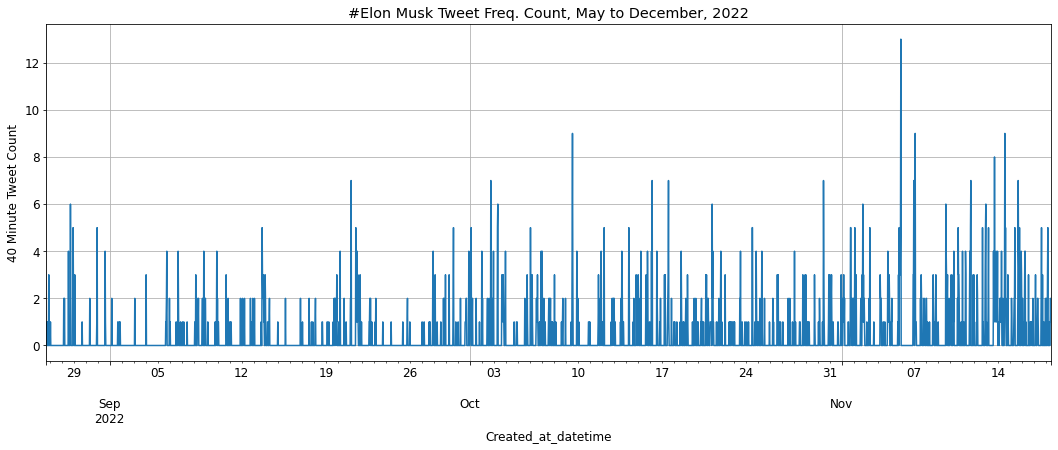

In [ ]:
tweet_df_5min = df.groupby(pd.Grouper(key='Created_at_datetime', freq='40Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('40 Minute Tweet Count')
plt.title('#Elon Musk Tweet Freq. Count, May to December, 2022')
plt.grid(True)

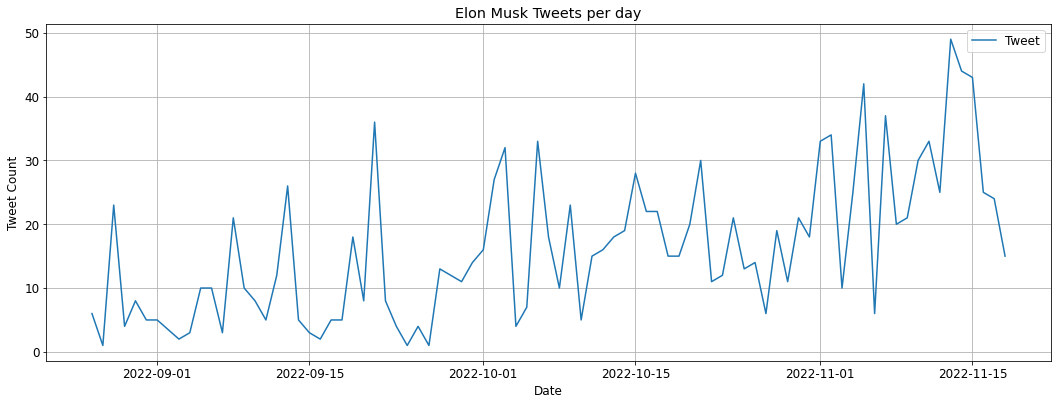

In [ ]:
def tweets_per_day(df):
    df['Date'] = pd.to_datetime(df['Created_at_datetime'], format='%Y-%m-%d')
    return df['Tweet'].groupby(df['Created_at_datetime'].dt.date).count()
count = pd.DataFrame(tweets_per_day(df))
count.plot(figsize=(18,6))
plt.ylabel('Tweet Count')
plt.xlabel('Date')
plt.title('Elon Musk Tweets per day')
plt.grid(True)

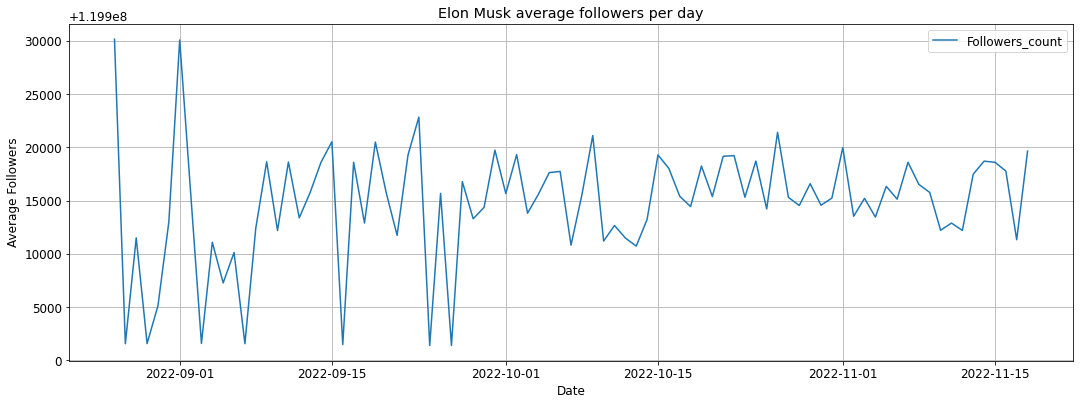

In [ ]:
def tweets_per_day(df):
    return df['Followers_count'].groupby(df['Created_at_datetime'].dt.date).mean()
count = pd.DataFrame(tweets_per_day(df))
count.plot(figsize=(18,6))
plt.ylabel('Average Followers')
plt.xlabel('Date')
plt.title('Elon Musk average followers per day')
plt.grid(True)

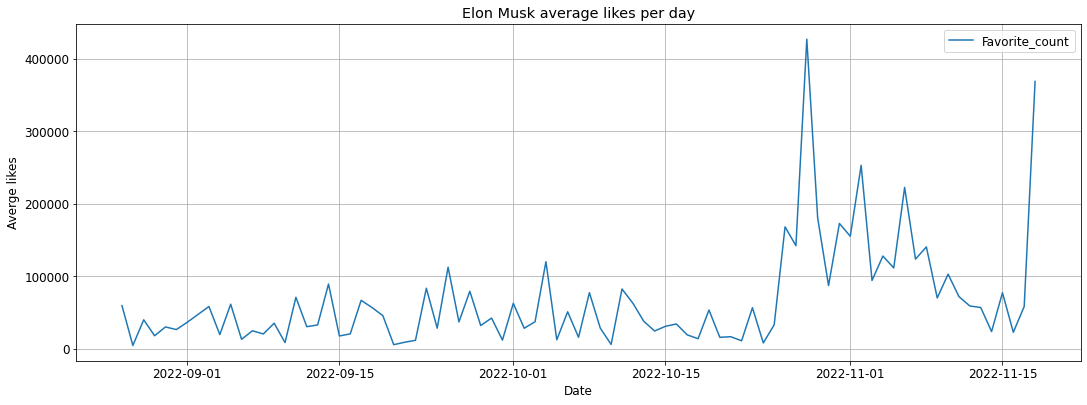

In [ ]:
def tweets_per_day(df):
    return df['Favorite_count'].groupby(df['Created_at_datetime'].dt.date).mean()
count = pd.DataFrame(tweets_per_day(df))
count.plot(figsize=(18,6))
plt.ylabel('Averge likes')
plt.xlabel('Date')
plt.title('Elon Musk average likes per day')
plt.grid(True)

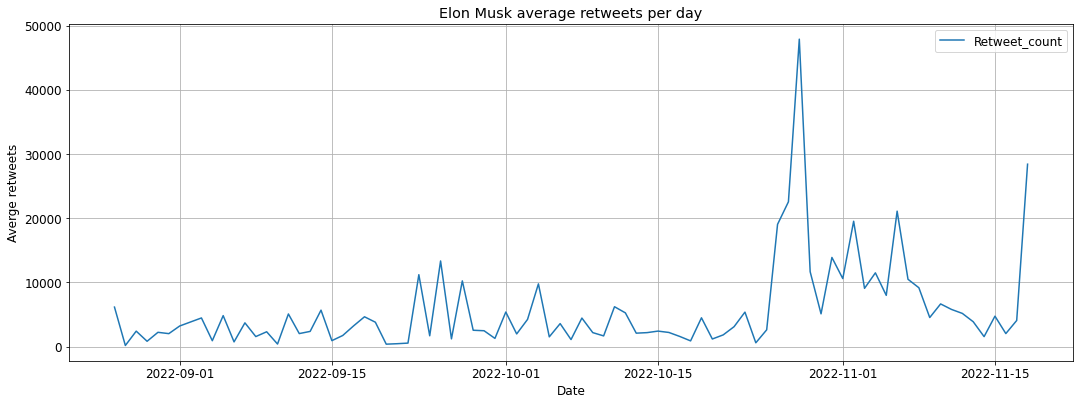

In [ ]:
def tweets_per_day(df):
    return df['Retweet_count'].groupby(df['Created_at_datetime'].dt.date).mean()
count = pd.DataFrame(tweets_per_day(df))
count.plot(figsize=(18,6))
plt.ylabel('Averge retweets')
plt.xlabel('Date')
plt.title('Elon Musk average retweets per day')
plt.grid(True)

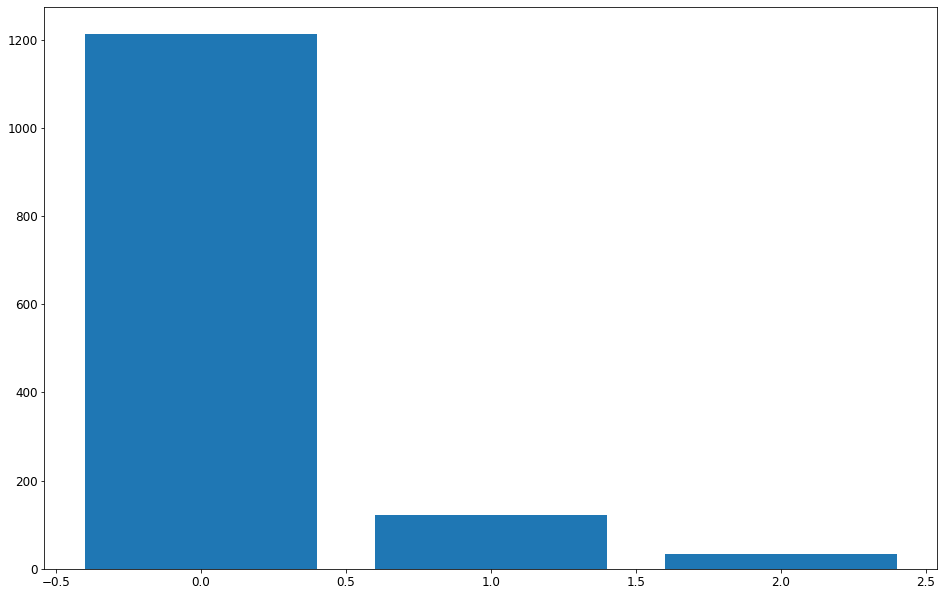

not related    1213
twitter         123
takeover         33
Name: topic, dtype: int64


In [ ]:
def get_candidate(row):
    topic = []
    text = row["Tweet"].lower()
    if "twitter" in text or "bird" in text or "tweet" in text:
        topic.append("twitter")
    elif "takeover" in text or "owner" in text or "power" in text or "freed" in text or "ownership" in text or "account" in text:
        topic.append("takeover")
    else:
      topic.append("not related")
    return ",".join(topic)
    
df["topic"] = df.apply(get_candidate,axis=1)

counts = df["topic"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)